#### Correlation is a statistical measure showing how two variables change together, indicating the strength and direction (positive/negative) of their linear relationship, 
#### quantified by the correlation coefficient (r) from -1 to +1, where 1 means perfect positive, -1 perfect negative, and 0 no linear relationship importantly, correlation doesn't imply causation, meaning one variable doesn't necessarily cause the other. 
#### Correlation value ranges from -1 to +1.

### Why is Correlation Used
#### 1. Understand relationships in data
#### 2. Feature Selection
#### 3. Detect Multicollinearity

In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
data = {
    'Feature_1': np.random.randint(10, 100, 50),
    'Feature_2': np.random.randint(5, 50, 50),
    'Feature_3': np.random.randint(0, 100, 50),
    'Feature_4': np.random.randint(20, 70, 50),
    'Feature_5': np.random.randint(10, 200, 50),
    'Feature_6': np.random.randint(1, 10, 50),
    'Feature_7': np.random.randint(0, 5, 50),
    'Feature_8': np.random.randint(100, 200, 50),
    'Feature_9': np.random.randint(50, 150, 50),
    'Feature_10': np.random.randint(0, 20, 50),
}

In [3]:
# Create target variable dependent on some features + noise
data['Target'] = 0.5 * np.array(data['Feature_1']) + 0.3 * np.array(data['Feature_5']) - 0.5 * np.array(data['Feature_2']) + np.random.normal(0, 5, 50)

In [4]:
df = pd.DataFrame(data)
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,61,18,0,23,189,3,1,131,81,0,88.865167
1,24,13,7,49,122,3,2,186,136,0,32.339561
2,81,30,87,56,71,4,4,132,112,14,46.041075
3,70,6,62,42,195,7,0,166,135,1,93.441586
4,30,24,10,58,61,4,3,117,100,15,22.704959


In [5]:
corr_matrix = df.corr()
corr_matrix

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
Feature_1,1.000000,-0.005556,-0.028640,-0.111605,-0.147378,-0.027044,0.079933,0.199016,-0.082770,-0.122760,0.537189
Feature_2,-0.005556,1.000000,-0.003254,0.276178,0.083128,0.000557,-0.057237,-0.357619,-0.061710,-0.062224,-0.273771
Feature_3,-0.028640,-0.003254,1.000000,0.139745,0.332430,0.095199,-0.081483,0.186289,-0.108860,0.070644,0.249055
Feature_4,-0.111605,0.276178,0.139745,1.000000,-0.143207,-0.303398,0.091221,-0.089885,-0.143179,-0.155984,-0.342757
Feature_5,-0.147378,0.083128,0.332430,-0.143207,1.000000,-0.010408,-0.182466,0.109207,0.033268,-0.172913,0.663832
Feature_6,-0.027044,0.000557,0.095199,-0.303398,-0.010408,1.000000,-0.108747,-0.050733,0.067206,0.198292,-0.008200
Feature_7,0.079933,-0.057237,-0.081483,0.091221,-0.182466,-0.108747,1.000000,0.292943,-0.175490,0.197493,-0.131751
Feature_8,0.199016,-0.357619,0.186289,-0.089885,0.109207,-0.050733,0.292943,1.000000,-0.100779,0.102911,0.287198
Feature_9,-0.082770,-0.061710,-0.108860,-0.143179,0.033268,0.067206,-0.175490,-0.100779,1.000000,0.082999,0.017258
Feature_10,-0.122760,-0.062224,0.070644,-0.155984,-0.172913,0.198292,0.197493,0.102911,0.082999,1.000000,-0.181549


In [6]:
# Correlation matrix
print(corr_matrix['Target'].sort_values(ascending=False))

Target        1.000000
Feature_5     0.663832
Feature_1     0.537189
Feature_8     0.287198
Feature_3     0.249055
Feature_9     0.017258
Feature_6    -0.008200
Feature_7    -0.131751
Feature_10   -0.181549
Feature_2    -0.273771
Feature_4    -0.342757
Name: Target, dtype: float64


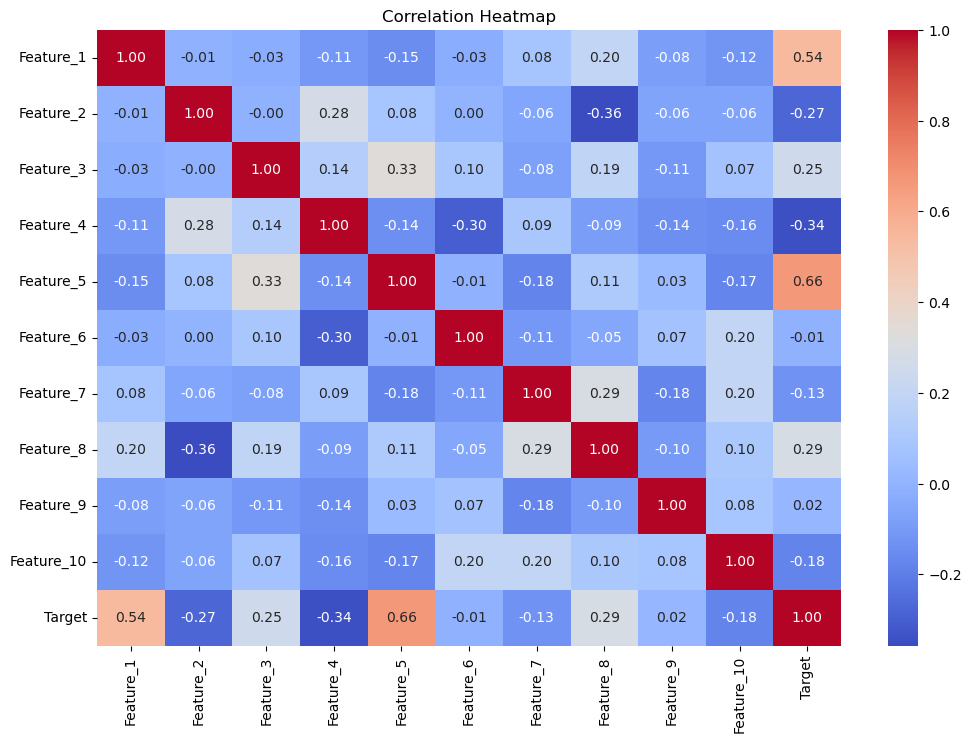

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [8]:
# Select features with correlation > 0.3 with target
important_features = corr_matrix['Target'][abs(corr_matrix['Target']) > 0.3].index.tolist()
important_features

['Feature_1', 'Feature_4', 'Feature_5', 'Target']

In [9]:
important_features.remove('Target')  # remove target itself
print("Important Features based on correlation:", important_features)

Important Features based on correlation: ['Feature_1', 'Feature_4', 'Feature_5']


### Multicollinearity
#### Multicollinearity occurs when two or more independent features are highly correlated in a dataset.
#### This causes redundancy in features.
#### Mainly affects linear models (Linear Regression, Logistic Regression, etc.)
#### Leads to unstable coefficients and high variance.

In [10]:
data = {
    'X1': np.random.randint(10, 50, 50),
    'X2': np.random.randint(5, 30, 50),
    'X3': np.random.randint(20, 70, 50),
    'X4': np.random.randint(100, 200, 50),
    'X5': np.random.randint(0, 10, 50),
    'X6': np.random.randint(50, 100, 50),
    'X7': np.random.randint(1, 5, 50),
    'X8': np.random.randint(0, 50, 50),
    'X9': np.random.randint(10, 60, 50),
    'X10': np.random.randint(0, 20, 50)
}

# Introduce multicollinearity: make X11 highly correlated with X1 and X4
data['X11'] = data['X1'] * 0.8 + data['X4'] * 0.2 + np.random.normal(0, 2, 50)

# Target variable (dependent on some features)
data['Target'] = 0.5*np.array(data['X1']) + 0.3*np.array(data['X5']) - 0.2*np.array(data['X2']) + np.random.normal(0,5,50)

df = pd.DataFrame(data)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Target
0,14,29,47,191,2,70,3,40,28,11,51.331844,0.650602
1,44,21,47,180,6,54,3,36,29,2,71.364110,22.740700
2,32,29,56,168,5,67,2,5,42,2,58.225210,18.050628
3,38,28,60,194,1,77,3,25,29,0,70.007641,9.607629
4,20,5,55,104,5,91,3,33,58,7,34.617219,2.986175


In [11]:
# Correlation matrix
corr_matrix = df.corr()
corr_matrix

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Target
X1,1.000000,-0.053910,0.053342,-0.083792,-0.075360,0.214260,-0.039240,0.159472,0.300469,0.127438,0.809408,0.781558
X2,-0.053910,1.000000,0.198631,0.400527,0.138365,-0.015038,-0.034376,0.077952,-0.007760,-0.250721,0.157165,-0.153941
X3,0.053342,0.198631,1.000000,0.087438,0.008869,-0.066756,0.216132,0.054286,-0.069415,-0.243511,0.050340,0.164732
X4,-0.083792,0.400527,0.087438,1.000000,-0.008635,0.079457,-0.090470,-0.146344,-0.012085,-0.246995,0.486761,-0.036016
X5,-0.075360,0.138365,0.008869,-0.008635,1.000000,0.107884,-0.106518,-0.221385,0.060277,0.040801,-0.046793,0.085235
X6,0.214260,-0.015038,-0.066756,0.079457,0.107884,1.000000,0.110854,0.201392,0.143440,0.180876,0.236948,0.180914
X7,-0.039240,-0.034376,0.216132,-0.090470,-0.106518,0.110854,1.000000,0.330350,0.174108,-0.264724,-0.091143,0.004480
X8,0.159472,0.077952,0.054286,-0.146344,-0.221385,0.201392,0.330350,1.000000,0.162426,0.248534,0.044115,0.127543
X9,0.300469,-0.007760,-0.069415,-0.012085,0.060277,0.143440,0.174108,0.162426,1.000000,-0.020897,0.284000,0.226917
X10,0.127438,-0.250721,-0.243511,-0.246995,0.040801,0.180876,-0.264724,0.248534,-0.020897,1.000000,-0.009834,-0.053792


In [12]:
# Correlation with Target
print(corr_matrix['Target'].sort_values(ascending=False))

Target    1.000000
X1        0.781558
X11       0.642064
X9        0.226917
X6        0.180914
X3        0.164732
X8        0.127543
X5        0.085235
X7        0.004480
X4       -0.036016
X10      -0.053792
X2       -0.153941
Name: Target, dtype: float64


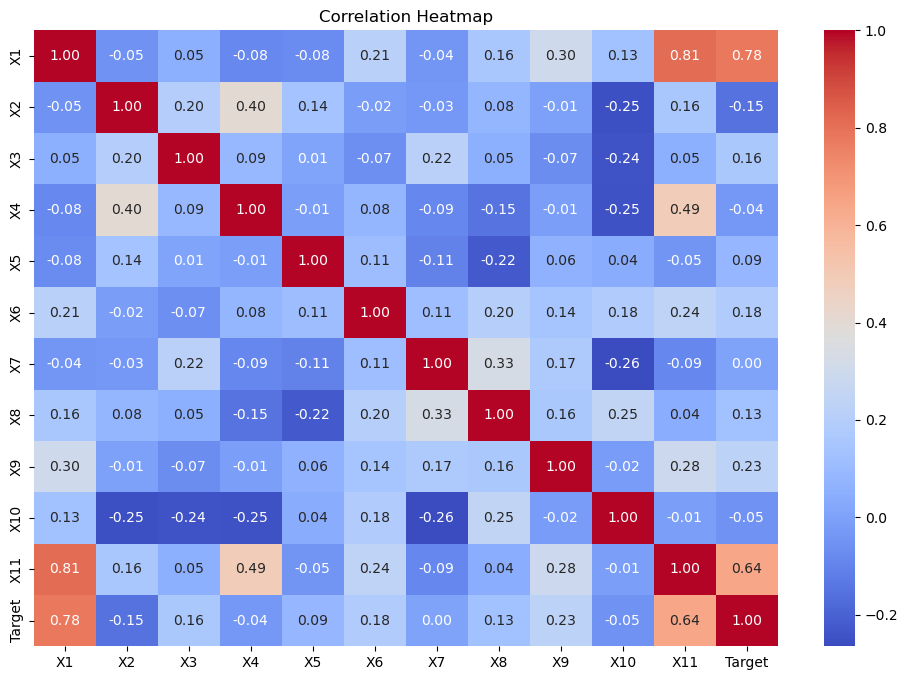

In [14]:
# Heatmap visualization
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Check VIF (Variance Inflation Factor)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [17]:
# Select only independent features
X = df.drop('Target', axis=1)

# Add constant for VIF calculation
X_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i+1) for i in range(X.shape[1])]  # +1 because const added
vif_data.sort_values(by='VIF', ascending=False,ignore_index=True)


,Feature,VIF
0,X11,31.975668
1,X1,24.350805
2,X4,11.753315
3,X8,1.562791
4,X10,1.538349
5,X7,1.486574
6,X2,1.417846
7,X9,1.234822
8,X3,1.214327
9,X6,1.200819


### Drop highly correlated feature

In [18]:
X_reduced = X.drop(['X11'], axis=1)
X_reduced

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,14,29,47,191,2,70,3,40,28,11
1,44,21,47,180,6,54,3,36,29,2
2,32,29,56,168,5,67,2,5,42,2
3,38,28,60,194,1,77,3,25,29,0
4,20,5,55,104,5,91,3,33,58,7
5,27,10,46,102,1,71,4,44,21,7
6,21,25,36,152,1,70,1,5,56,10
7,18,10,28,122,1,55,2,36,10,8
8,19,16,52,152,2,50,2,32,35,4
9,26,17,39,136,1,54,2,21,23,13


In [19]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,14,29,47,191,2,70,3,40,28,11,51.331844
1,44,21,47,180,6,54,3,36,29,2,71.364110
2,32,29,56,168,5,67,2,5,42,2,58.225210
3,38,28,60,194,1,77,3,25,29,0,70.007641
4,20,5,55,104,5,91,3,33,58,7,34.617219


#### Use PCA (Dimensionality Reduction)

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # retain 95% variance
X_pca = pca.fit_transform(X)
print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)


Original shape: (50, 11)
Reduced shape: (50, 6)


In [27]:
pd.DataFrame(data=X_pca )

,0,1,2,3,4,5
0,37.453725,-5.936192,7.503226,15.745359,21.644661,-6.504869
1,29.602485,7.312957,11.139169,-10.389290,5.313377,-28.889876
2,19.998521,-1.805813,4.189753,-20.321435,-2.726958,8.081838
3,46.491241,8.430098,16.150310,-1.408803,-5.684396,-5.637622
4,-50.149461,18.126947,4.872924,4.649937,13.765320,28.923527
5,-53.009441,-1.080900,11.270082,14.249708,5.823093,-9.581180
6,1.351779,1.484707,-18.208140,-17.387102,10.171249,14.531104
7,-34.908750,-21.978197,-5.477596,12.902828,10.755633,-22.817829
8,-2.607173,-12.348811,10.758901,-8.017616,22.151264,-6.995001
9,-17.237228,-14.551390,-2.094332,-5.877412,3.823449,-14.804376


##### | Aspect            | Correlation (for target) | Multicollinearity (between features) |
##### | ----------------- | ------------------------ | ------------------------------------ |
##### | Variables checked | Feature vs Target        | Feature vs Feature                   |
##### | Purpose           | Feature importance       | Feature redundancy / stability       |
##### | Typical metric    | Pearson / Spearman       | Correlation matrix / VIF             |
##### | Model affected    | All models               | Linear/gradient-based models         |
